## Santa Fe River at Graham

In [250]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FixedLocator, FuncFormatter
import numpy as np
import pandas as pd

Specify the scenarios to be read. Must match Part F in the DSS file. Only doing cell size tests for now. Additional parameter testing done later

In [251]:
scenarios = [
                "100yr_Base", 
                "100yr_Single_100",
                "100yr_Single_200",
                "100yr_Single_500",
                "100yr_Single_1000",
                "100yr_Single_2000",
                "100yr_Breaklines_50_100",
                "100yr_Breaklines_50_200",
                "100yr_Breaklines_100_500",
                "100yr_Breaklines_200_500",
                "100yr_Breaklines_300_1000",
                "100yr_Breaklines_300_2000",
                "100yr_Breaklines_500_2000",
                "100yr_Refinement_50_200",
                "100yr_Refinement_200_500",
                "100yr_Refinement_300_2000",
                "100yr_Hexagonal_50_200",
                "100yr_Hexagonal_300_2000",
                "100yr_EmbankmentBr_50_200",
                "100yr_EmbankmentBr_300_2000",
                "100yr_Br_50_200_025sqmi",
                "100yr_Br_300_2000_025sqmi",
]

The csv is created directly from the DSS file since for some reason I can't get python to read the DSS file correctly. Use the Tabulate in MS Excel tool and save as a csv. Row 4 contains the names of the scnearios. Rows 5 and 6 contain the units and type and can be skipped. The number of rows (nrows) is specified in case there are values beyond the simulation time window (a RAS bug?)

In [252]:
csv = r".\\Data\SantaFeRiver_Graham.csv"
df = pd.read_csv(csv, header=4, skiprows=[5,6], nrows=481)
df.rename(columns={"F": "Ordinate", "Unnamed: 1":"Datetime"}, inplace=True)
df.head()

,Ordinate,Datetime,100yr_Base,100yr_Br_300_2000_025sqmi,100yr_Br_300_2000_CN10PctLower,100yr_Br_300_2000_CN10PctPlus,100yr_Br_300_2000_FixedTime_DW,100yr_Br_300_2000_FixedTime_SWE,100yr_Br_300_2000_MannN10PctLower,100yr_Br_300_2000_MannN10PctPlus,...,100yr_Hexagonal_300_2000,100yr_Hexagonal_50_200,100yr_Refinement_200_500,100yr_Refinement_300_2000,100yr_Refinement_50_200,100yr_Single_100,100yr_Single_1000,100yr_Single_200,100yr_Single_2000,100yr_Single_500
0,1,01Jan2000 0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,01Jan2000 0015,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,01Jan2000 0030,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,01Jan2000 0045,0.0,0.0,0.0,0.7,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,01Jan2000 0100,0.0,0.0,0.0,1.3,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.0


In [253]:
df.describe()

,Ordinate,100yr_Base,100yr_Br_300_2000_025sqmi,100yr_Br_300_2000_CN10PctLower,100yr_Br_300_2000_CN10PctPlus,100yr_Br_300_2000_FixedTime_DW,100yr_Br_300_2000_FixedTime_SWE,100yr_Br_300_2000_MannN10PctLower,100yr_Br_300_2000_MannN10PctPlus,100yr_Br_300_2000_MaxCourant_3_DW,...,100yr_Hexagonal_300_2000,100yr_Hexagonal_50_200,100yr_Refinement_200_500,100yr_Refinement_300_2000,100yr_Refinement_50_200,100yr_Single_100,100yr_Single_1000,100yr_Single_200,100yr_Single_2000,100yr_Single_500
count,481.000000,481.000000,481.000000,481.00000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,...,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000
mean,241.000000,1267.453430,1337.743243,1115.30000,1472.082121,1322.047193,1342.376091,1319.572765,1239.528898,1321.612266,...,1290.139501,1273.317879,1293.205613,1329.574428,1269.045530,1234.668399,1317.825780,1260.375468,1196.172141,1212.660291
std,138.997002,913.469104,981.553998,768.00223,1079.498387,941.402367,957.110391,960.343431,808.049877,941.699987,...,886.465788,886.927899,912.348790,953.909040,919.765306,833.884482,964.724088,877.078693,646.789539,830.395487
min,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,-0.300000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,121.000000,527.400000,535.500000,502.70000,627.800000,575.300000,575.900000,568.700000,620.500000,575.400000,...,609.500000,543.400000,585.600000,579.400000,519.100000,544.400000,545.400000,556.800000,672.000000,577.700000
50%,241.000000,1027.400000,1025.300000,937.80000,1115.300000,1045.100000,1056.200000,1016.400000,1055.400000,1045.300000,...,1043.000000,1052.700000,1049.900000,1048.400000,1019.800000,1051.800000,996.400000,1028.500000,1162.500000,1004.200000
75%,361.000000,2091.300000,2176.600000,1733.60000,2324.000000,2090.000000,2107.100000,2075.600000,1879.100000,2090.500000,...,2000.700000,2115.000000,2044.700000,2098.100000,2100.200000,2036.200000,2184.600000,2044.500000,1767.600000,1879.300000
max,481.000000,3719.900000,3728.000000,3017.00000,4377.400000,3743.100000,3853.100000,3753.700000,3223.100000,3747.100000,...,3439.400000,3460.100000,3810.500000,3844.200000,3687.500000,3231.700000,3290.500000,3468.900000,2394.900000,3393.100000


In [254]:
# Check that the data ends where it should
df.tail()

,Ordinate,Datetime,100yr_Base,100yr_Br_300_2000_025sqmi,100yr_Br_300_2000_CN10PctLower,100yr_Br_300_2000_CN10PctPlus,100yr_Br_300_2000_FixedTime_DW,100yr_Br_300_2000_FixedTime_SWE,100yr_Br_300_2000_MannN10PctLower,100yr_Br_300_2000_MannN10PctPlus,...,100yr_Hexagonal_300_2000,100yr_Hexagonal_50_200,100yr_Refinement_200_500,100yr_Refinement_300_2000,100yr_Refinement_50_200,100yr_Single_100,100yr_Single_1000,100yr_Single_200,100yr_Single_2000,100yr_Single_500
476,477,05Jan2000 2300,381.9,403.2,369.9,490.2,444.0,450.7,439.0,484.9,...,459.8,396.0,438.4,448.8,378.2,395.2,422.2,411.8,525.7,454.2
477,478,05Jan2000 2315,380.2,401.9,368.4,488.8,442.6,449.2,437.5,482.8,...,457.8,394.4,436.6,447.4,376.9,392.9,420.7,410.1,523.9,451.2
478,479,05Jan2000 2330,378.5,400.5,366.9,487.3,441.1,447.8,436.1,480.8,...,455.9,392.8,434.8,445.9,375.2,391.0,419.2,408.5,522.1,448.4
479,480,05Jan2000 2345,376.8,399.2,365.4,485.9,439.6,446.4,434.7,478.8,...,453.9,391.0,433.0,444.4,373.5,389.4,417.7,406.8,520.4,445.9
480,481,06Jan2000 0000,375.4,397.8,363.9,484.5,438.2,445.0,433.3,476.9,...,452.0,389.2,431.3,443.0,371.9,388.1,416.2,405.1,518.6,443.5


In [255]:
# Create a minutes column to be used for plotting
df['Minutes'] = df['Ordinate'] * 15 - 15
df['Hours'] = df['Minutes']/60
df['Days'] = df['Minutes']/60/24

In [256]:
figure_title = 'Santa Fe River at Graham Flow Comparison'

In [257]:
# Add 1% AEP flow from gage analysis at Graham
df['Gage'] = 3577

In [258]:
# https://sashamaps.net/docs/resources/20-colors/
# The Base scenario is black and all other scenarios are grey
colors = ['#e6194B', '#3cb44b', '#42d4f4', '#f032e6', '#f58231', '#ffe119', '#bfef45', '#4363d8', '#911eb4']

# Single Size Cells

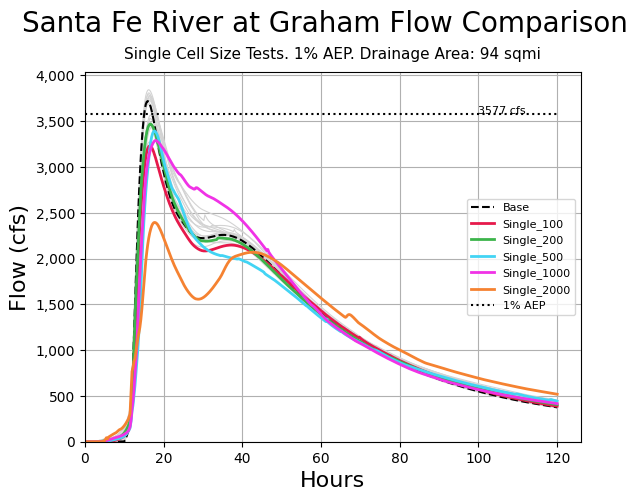

In [259]:
count = 0   # Used to cycle to colors list to highlight scenarios

fig = plt.figure()
fig.suptitle(figure_title, y=1.01, fontsize=20)
plt.title("Single Cell Size Tests. 1% AEP. Drainage Area: 94 sqmi", fontsize=11, pad=10)
plt.xlabel('Hours', fontsize=16)
plt.ylabel('Flow (cfs)', fontsize=16)

# All other scenarios plotted as grey lines
for sc in scenarios:
    if 'Single' not in sc:
        plt.plot('Hours', sc, data=df, linestyle='-', linewidth=0.8, color='lightgrey', label='')

# The Base hydrograph
plt.plot('Hours', "100yr_Base", data=df, linestyle='--', color='black', label='Base')
        
# To plot the scenarios of interest on top of other lines
for sc in scenarios:
    if 'Single' in sc:
        plt.plot('Hours', sc, data=df, linestyle='-', linewidth=2, color=colors[count], label=sc.replace("100yr_", ""))
        count += 1 

# The 1% AEP value
plt.plot('Hours', "Gage", data=df, linestyle=':', color='black', label='1% AEP')
plt.text(100, df['Gage'].max()+10, "3577 cfs", fontsize=8)

# Add thousand separator comma
plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))

# Set axes to start in bottom left corner
plt.xlim(left=0)
plt.ylim(bottom=0)

plt.grid()
plt.legend(prop={'size': 8})
plt.savefig('Figures/SantaFe_Graham_Single.png', bbox_inches='tight')
plt.show()

# Breaklines

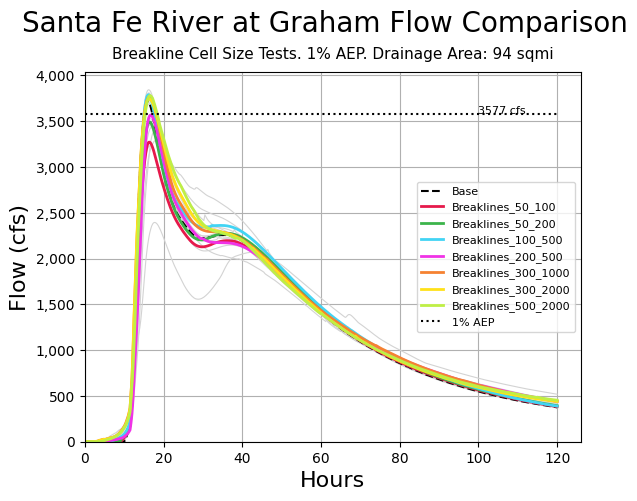

In [260]:
count = 0   # Used to cycle to colors list to highlight scenarios

fig = plt.figure()
fig.suptitle(figure_title, y=1.01, fontsize=20)
plt.title("Breakline Cell Size Tests. 1% AEP. Drainage Area: 94 sqmi", fontsize=11, pad=10)
plt.xlabel('Hours', fontsize=16)
plt.ylabel('Flow (cfs)', fontsize=16)

# All other scenarios plotted as grey lines
for sc in scenarios:
    if 'Breakline' not in sc:
        plt.plot('Hours', sc, data=df, linestyle='-', linewidth=0.8, color='lightgrey', label='')

# The Base hydrograph
plt.plot('Hours', "100yr_Base", data=df, linestyle='--', color='black', label='Base')

# To plot the scenarios of interest on top of other lines
for sc in scenarios:
    if 'Breakline' in sc:
        plt.plot('Hours', sc, data=df, linestyle='-', linewidth=2, color=colors[count], label=sc.replace("100yr_", ""))
        count += 1 

# The 1% AEP value
plt.plot('Hours', "Gage", data=df, linestyle=':', color='black', label='1% AEP')
plt.text(100, df['Gage'].max()+10, "3577 cfs", fontsize=8)

# Add thousand separator comma
plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))

# Set axes to start in bottom left corner
plt.xlim(left=0)
plt.ylim(bottom=0)

plt.grid()
plt.legend(prop={'size': 8})
plt.savefig('Figures/SantaFe_Graham_Breakline.png', bbox_inches='tight')
plt.show()

# Refinement

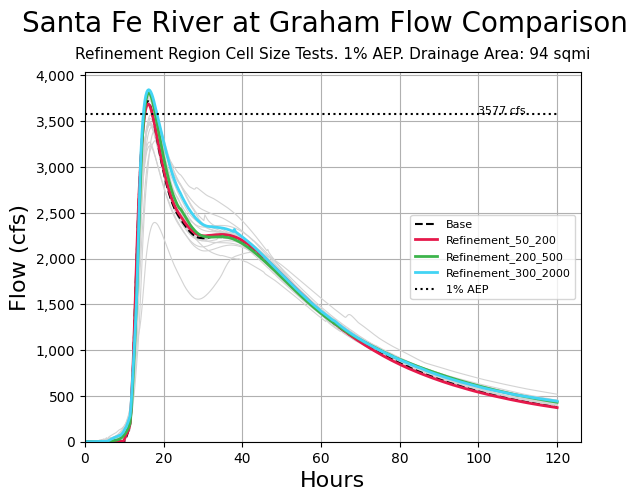

In [261]:
count = 0   # Used to cycle to colors list to highlight scenarios

fig = plt.figure()
fig.suptitle(figure_title, y=1.01, fontsize=20)
plt.title("Refinement Region Cell Size Tests. 1% AEP. Drainage Area: 94 sqmi", fontsize=11, pad=10)
plt.xlabel('Hours', fontsize=16)
plt.ylabel('Flow (cfs)', fontsize=16)

# All other scenarios plotted as grey lines
for sc in scenarios:
    if 'Refinement' not in sc:
        plt.plot('Hours', sc, data=df, linestyle='-', linewidth=0.8, color='lightgrey', label='')

# The Base hydrograph
plt.plot('Hours', "100yr_Base", data=df, linestyle='--', color='black', label='Base')

# To plot the scenarios of interest on top of other lines
for sc in scenarios:
    if 'Refinement' in sc:
        plt.plot('Hours', sc, data=df, linestyle='-', linewidth=2, color=colors[count], label=sc.replace("100yr_", ""))
        count += 1 

# The 1% AEP value
plt.plot('Hours', "Gage", data=df, linestyle=':', color='black', label='1% AEP')
plt.text(100, df['Gage'].max()+10, "3577 cfs", fontsize=8)

# Add thousand separator comma
plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))

# Set axes to start in bottom left corner
plt.xlim(left=0)
plt.ylim(bottom=0)

plt.grid()
plt.legend(prop={'size': 8})
plt.savefig('Figures/SantaFe_Graham_Refinement.png', bbox_inches='tight')
plt.show()

# Other Cell Size Tests

In [262]:
other_200_scenarios = [
    "100yr_Hexagonal_50_200",
    "100yr_EmbankmentBr_50_200",
    "100yr_Br_50_200_025sqmi",
]

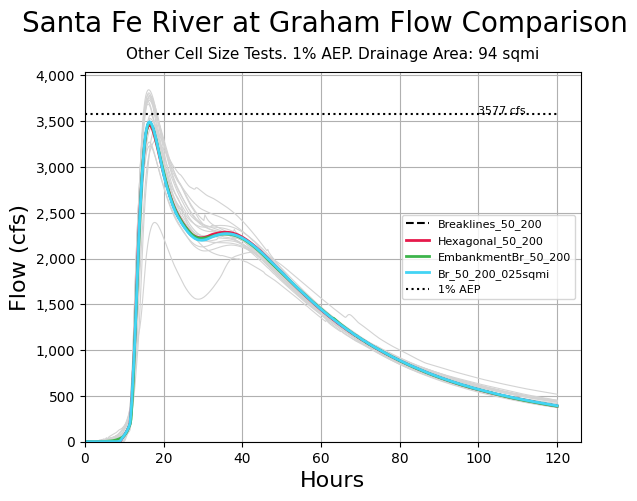

In [263]:
count = 0   # Used to cycle to colors list to highlight scenarios

fig = plt.figure()
fig.suptitle(figure_title, y=1.01, fontsize=20)
plt.title("Other Cell Size Tests. 1% AEP. Drainage Area: 94 sqmi", fontsize=11, pad=10)
plt.xlabel('Hours', fontsize=16)
plt.ylabel('Flow (cfs)', fontsize=16)

# All other scenarios plotted as grey lines
for sc in scenarios:
    if sc not in other_200_scenarios:
        plt.plot('Hours', sc, data=df, linestyle='-', linewidth=0.8, color='lightgrey', label='')

# The Base hydrograph
plt.plot('Hours', "100yr_Breaklines_50_200", data=df, linestyle='--', color='black', label='Breaklines_50_200')
        
# To plot the scenarios of interest on top of other lines
for sc in scenarios:
    if sc in other_200_scenarios:
        plt.plot('Hours', sc, data=df, linestyle='-', linewidth=2, color=colors[count], label=sc.replace("100yr_", ""))
        count += 1 

# The 1% AEP value
plt.plot('Hours', "Gage", data=df, linestyle=':', color='black', label='1% AEP')
plt.text(100, df['Gage'].max()+10, "3577 cfs", fontsize=8)

# Add thousand separator comma
plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))

# Set axes to start in bottom left corner
plt.xlim(left=0)
plt.ylim(bottom=0)

plt.grid()
plt.legend(prop={'size': 8})
plt.savefig('Figures/SantaFe_Graham_OtherCellSize_200.png', bbox_inches='tight')
plt.show()

In [264]:
other_2000_scenarios = [
    "100yr_Hexagonal_300_2000",
    "100yr_EmbankmentBr_300_2000",
    "100yr_Br_300_2000_025sqmi",
]

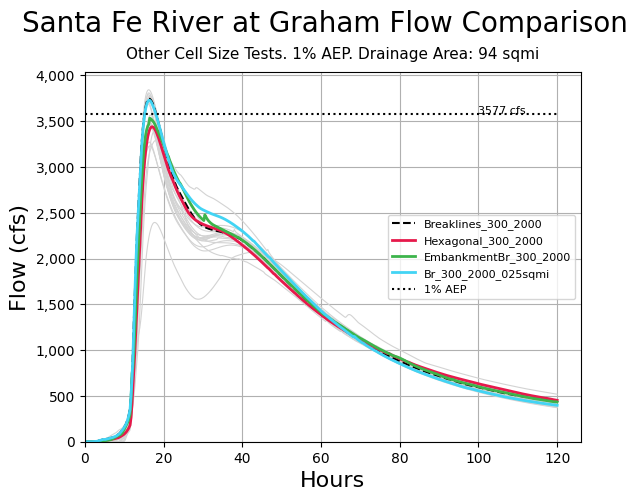

In [265]:
count = 0   # Used to cycle to colors list to highlight scenarios

fig = plt.figure()
fig.suptitle(figure_title, y=1.01, fontsize=20)
plt.title("Other Cell Size Tests. 1% AEP. Drainage Area: 94 sqmi", fontsize=11, pad=10)
plt.xlabel('Hours', fontsize=16)
plt.ylabel('Flow (cfs)', fontsize=16)

# All other scenarios plotted as grey lines
for sc in scenarios:
    if sc not in other_2000_scenarios:
        plt.plot('Hours', sc, data=df, linestyle='-', linewidth=0.8, color='lightgrey', label='')

# The Base hydrograph
plt.plot('Hours', "100yr_Breaklines_300_2000", data=df, linestyle='--', color='black', label='Breaklines_300_2000')
        
# To plot the scenarios of interest on top of other lines
for sc in scenarios:
    if sc in other_2000_scenarios:
        plt.plot('Hours', sc, data=df, linestyle='-', linewidth=2, color=colors[count], label=sc.replace("100yr_", ""))
        count += 1 

# The 1% AEP value
plt.plot('Hours', "Gage", data=df, linestyle=':', color='black', label='1% AEP')
plt.text(100, df['Gage'].max()+10, "3577 cfs", fontsize=8)

# Add thousand separator comma
plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))

# Set axes to start in bottom left corner
plt.xlim(left=0)
plt.ylim(bottom=0)

plt.grid()
plt.legend(prop={'size': 8})
plt.savefig('Figures/SantaFe_Graham_OtherCellSize_2000.png', bbox_inches='tight')
plt.show()

# Additional Parameter Tests

In [266]:
additional_scenarios = [
    "100yr_Base",
    "100yr_Br_50_200_CN10PctPlus",
    "100yr_Br_300_2000_CN10PctPlus",
    "100yr_Br_50_200_CN10PctLower",
    "100yr_Br_300_2000_CN10PctLower",
    "100yr_Br_50_200_MannN10PctPlus",
    "100yr_Br_300_2000_MannN10PctPlus",
    "100yr_Br_50_200_MannN10PctLower",
    "100yr_Br_300_2000_MannN10PctLower",
    "100yr_Br_50_200_SWE",
    "100yr_Br_300_2000_SWE",
    "100yr_Br_50_200_MaxCourant_5_DW",
    "100yr_Br_300_2000_MaxCourant_5_DW",
    "100yr_Br_50_200_MaxCourant_3_DW",
    "100yr_Br_300_2000_MaxCourant_3_DW",
    "100yr_Br_50_200_MaxCourant_3_SWE",
    "100yr_Br_300_2000_MaxCourant_3_SWE",
    "100yr_Br_50_200_FixedTime_DW",
    "100yr_Br_300_2000_FixedTime_DW",
    "100yr_Br_50_200_FixedTime_SWE",
    "100yr_Br_300_2000_FixedTime_SWE",
]

# Curve Number

In [267]:
cn_scenarios = [
    "100yr_Base",
    "100yr_Br_50_200_CN10PctPlus",
    "100yr_Br_300_2000_CN10PctPlus",
    "100yr_Br_50_200_CN10PctLower",
    "100yr_Br_300_2000_CN10PctLower",
]

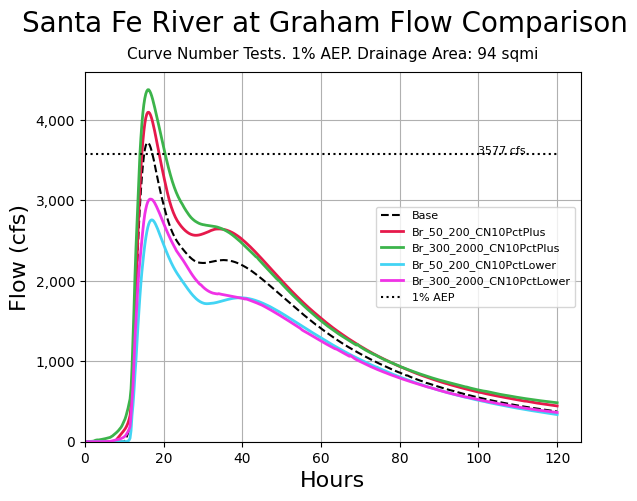

In [268]:
count = 0   # Used to cycle to colors list to highlight scenarios

fig = plt.figure()
fig.suptitle(figure_title, y=1.01, fontsize=20)
plt.title("Curve Number Tests. 1% AEP. Drainage Area: 94 sqmi", fontsize=11, pad=10)
plt.xlabel('Hours', fontsize=16)
plt.ylabel('Flow (cfs)', fontsize=16)

# The Base hydrograph
plt.plot('Hours', "100yr_Base", data=df, linestyle='--', color='black', label='Base')

for sc in cn_scenarios:
    if 'CN' in sc:
        plt.plot('Hours', sc, data=df, linestyle='-', linewidth=2, color=colors[count], label=sc.replace("100yr_", ""))
        count += 1 

# The 1% AEP value
plt.plot('Hours', "Gage", data=df, linestyle=':', color='black', label='1% AEP')
plt.text(100, df['Gage'].max()+10, "3577 cfs", fontsize=8)

# Add thousand separator comma
plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))

# Set axes to start in bottom left corner
plt.xlim(left=0)
plt.ylim(bottom=0)

plt.grid()
plt.legend(prop={'size': 8})
plt.savefig('Figures/SantaFe_Graham_CN.png', bbox_inches='tight')
plt.show()

# Mannings

In [269]:
mannings_scenarios = [
    "100yr_Base",
    "100yr_Br_50_200_MannN10PctPlus",
    "100yr_Br_300_2000_MannN10PctPlus",
    "100yr_Br_50_200_MannN10PctLower",
    "100yr_Br_300_2000_MannN10PctLower",
]

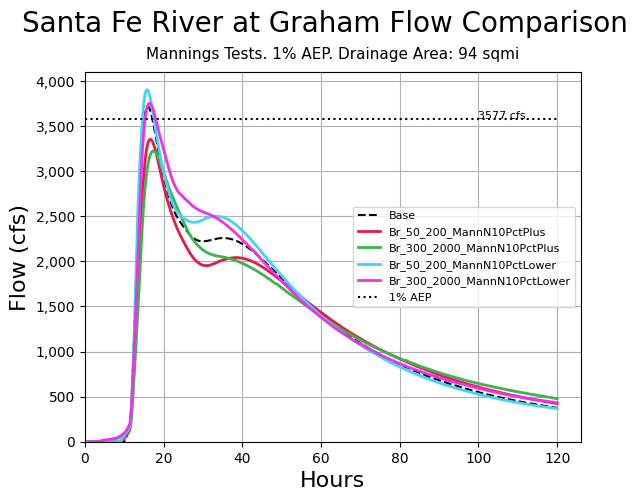

In [270]:
count = 0   # Used to cycle to colors list to highlight scenarios

fig = plt.figure()
fig.suptitle(figure_title, y=1.01, fontsize=20)
plt.title("Mannings Tests. 1% AEP. Drainage Area: 94 sqmi", fontsize=11, pad=10)
plt.xlabel('Hours', fontsize=16)
plt.ylabel('Flow (cfs)', fontsize=16)


# The Base hydrograph
plt.plot('Hours', "100yr_Base", data=df, linestyle='--', color='black', label='Base')

for sc in mannings_scenarios:
    if 'Mann' in sc:
        plt.plot('Hours', sc, data=df, linestyle='-', linewidth=2, color=colors[count], label=sc.replace("100yr_", ""))
        count += 1 

# The 1% AEP value
plt.plot('Hours', "Gage", data=df, linestyle=':', color='black', label='1% AEP')
plt.text(100, df['Gage'].max()+10, "3577 cfs", fontsize=8)

# Add thousand separator comma
plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))

# Set axes to start in bottom left corner
plt.xlim(left=0)
plt.ylim(bottom=0)

plt.grid()
plt.legend(prop={'size': 8})
plt.savefig('Figures/SantaFe_Graham_Mannings.png', bbox_inches='tight')
plt.show()

# Time Step and Courant Tests

In [271]:
time_200_scenarios = [
    "100yr_Breaklines_50_200_SWE",
    "100yr_Br_50_200_MaxCourant_5_DW",
    "100yr_Br_50_200_MaxCourant_3_DW",
    "100yr_Br_50_200_MaxCourant_3_SWE",
    "100yr_Br_50_200_FixedTime_DW",
    "100yr_Br_50_200_FixedTime_SWE",
]

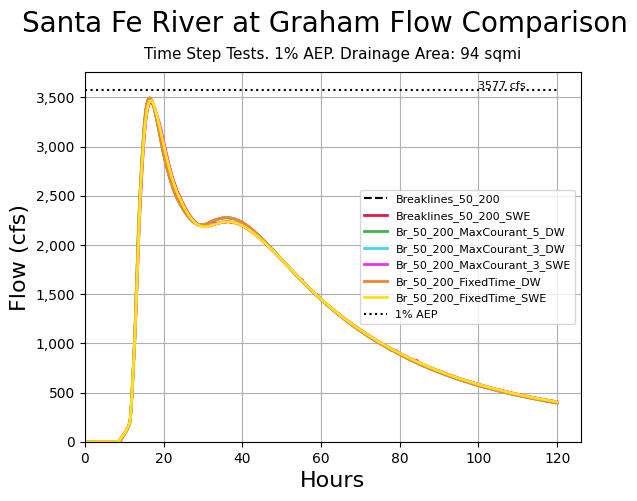

In [272]:
count = 0   # Used to cycle to colors list to highlight scenarios

fig = plt.figure()
fig.suptitle(figure_title, y=1.01, fontsize=20)
plt.title("Time Step Tests. 1% AEP. Drainage Area: 94 sqmi", fontsize=11, pad=10)
plt.xlabel('Hours', fontsize=16)
plt.ylabel('Flow (cfs)', fontsize=16)


# The Base hydrograph
plt.plot('Hours', "100yr_Breaklines_50_200", data=df, linestyle='--', color='black', label='Breaklines_50_200')

for sc in time_200_scenarios:
    plt.plot('Hours', sc, data=df, linestyle='-', linewidth=2, color=colors[count], label=sc.replace("100yr_", ""))
    count += 1

# The 1% AEP value
plt.plot('Hours', "Gage", data=df, linestyle=':', color='black', label='1% AEP')
plt.text(100, df['Gage'].max()+10, "3577 cfs", fontsize=8)

# Add thousand separator comma
plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))

# Set axes to start in bottom left corner
plt.xlim(left=0)
plt.ylim(bottom=0)

plt.grid()
plt.legend(prop={'size': 8})
plt.savefig('Figures/SantaFe_Graham_TimeStep_200.png', bbox_inches='tight')
plt.show()

In [273]:
time_2000_scenarios = [
    "100yr_Breaklines_300_2000_SWE",
    "100yr_Br_300_2000_MaxCourant_5_DW",
    "100yr_Br_300_2000_MaxCourant_3_DW",
    "100yr_Br_300_2000_MaxCourant_3_SWE",
    "100yr_Br_300_2000_FixedTime_DW",
    "100yr_Br_300_2000_FixedTime_SWE",
]

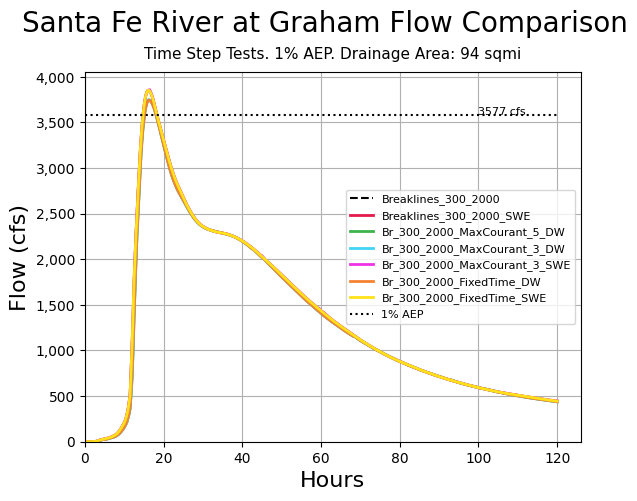

In [274]:
count = 0   # Used to cycle to colors list to highlight scenarios

fig = plt.figure()
fig.suptitle(figure_title, y=1.01, fontsize=20)
plt.title("Time Step Tests. 1% AEP. Drainage Area: 94 sqmi", fontsize=11, pad=10)
plt.xlabel('Hours', fontsize=16)
plt.ylabel('Flow (cfs)', fontsize=16)

# The Base hydrograph
plt.plot('Hours', "100yr_Breaklines_300_2000", data=df, linestyle='--', color='black', label='Breaklines_300_2000')

# To plot the scenarios of interest on top of other lines
for sc in time_2000_scenarios:
    plt.plot('Hours', sc, data=df, linestyle='-', linewidth=2, color=colors[count], label=sc.replace("100yr_", ""))
    count += 1

# The 1% AEP value
plt.plot('Hours', "Gage", data=df, linestyle=':', color='black', label='1% AEP')
plt.text(100, df['Gage'].max()+10, "3577 cfs", fontsize=8)

# Add thousand separator comma
plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))

# Set axes to start in bottom left corner
plt.xlim(left=0)
plt.ylim(bottom=0)

plt.grid()
plt.legend(prop={'size': 8})
plt.savefig('Figures/SantaFe_Graham_TimeStep_2000.png', bbox_inches='tight')
plt.show()